In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from PIL import Image
np.random.seed(42)

#### Load Model

In [6]:
# Define label for each class
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [7]:


# Load the model from the .h5 file
model = load_model('./model_cnn_keras.h5')
print("Model loaded successfully!")


Model loaded successfully!


#### Load Testing data and Predict

In [8]:
data_dir = "../../Dataset/GTSRB"
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

# Preprocess images
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test / 255.0  # Normalize the test data

# Predict probabilities
predictions = model.predict(X_test)

# Get the class index with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_classes) * 100

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Evaluate the model to get test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, labels, verbose=0)

print(f'Test Data Loss: {test_loss:.2f}')
print(f'Test Data Accuracy: {accuracy:.2f}%')


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data Loss: 0.09
Test Data Accuracy: 97.92%


#### Classification Report

In [9]:
from sklearn.metrics import classification_report

print(classification_report(labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        60
           1       0.97      1.00      0.98       720
           2       0.99      0.99      0.99       750
           3       0.97      1.00      0.98       450
           4       1.00      0.99      1.00       660
           5       1.00      0.98      0.99       630
           6       1.00      0.97      0.99       150
           7       1.00      1.00      1.00       450
           8       1.00      0.98      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.96      0.99      0.98       420
          12       0.99      1.00      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

#### Confusion Metrics

<Figure size 2000x2000 with 0 Axes>

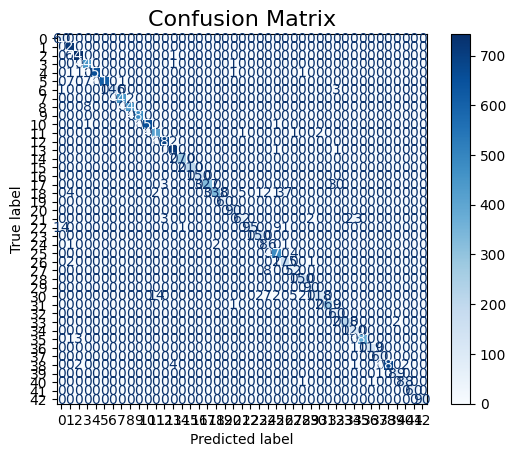

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix", fontsize=16)
plt.show()


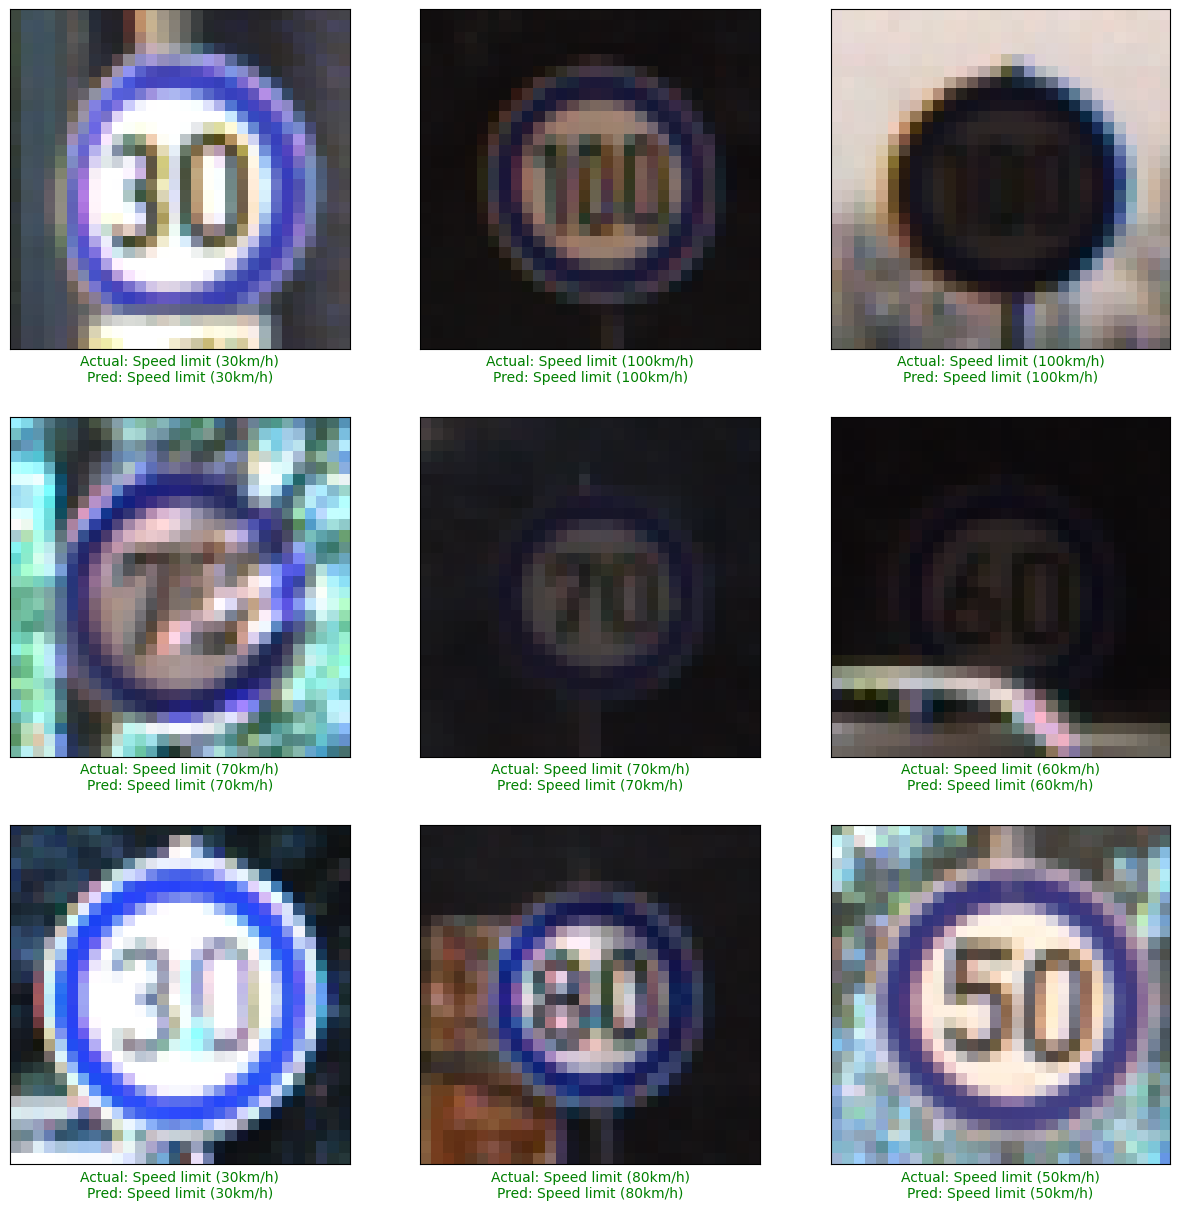

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

start_index = 0
end_index = 8  # We will limit the classes to 0-8
filtered_indices = [i for i in range(len(labels)) if labels[i] >= 0 and labels[i] <= 8]

for i, idx in enumerate(filtered_indices[:9]):  # Limiting to the first 9 samples
    plt.subplot(3, 3, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Map predicted and actual classes to their descriptions
    prediction = predicted_classes[idx]
    actual = labels[idx]
    pred_label = classes[prediction]
    actual_label = classes[actual]
    
    # Set color for correct/incorrect predictions
    col = 'g' if prediction == actual else 'r'
    
    # Display the labels in the title
    plt.xlabel(f'Actual: {actual_label}\nPred: {pred_label}', color=col)
    plt.imshow(X_test[idx])
plt.show()
